# Main Project

# Domain:  HR

<u>Problem Statement </u>

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 80% are considered) etc., employee gets promotion For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.


In [1]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
#Reading the dataset to the python environment
url='https://raw.githubusercontent.com/kevin-m-s/kevin-m-s-Norka_DSA-_B3-2021-Competition/main/Project-HR%20Analytics%20Employee%20Promotion.csv'
data=pd.read_csv(url)
#displaying  top 5  rows of the dataset
data.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [3]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<div class="alert alert-block alert-info"><b>About our Dataset:</b><br>  <strong>
    
```    
(1)This dataset contains  details of 54808 employess in a company provided by HR Department        
(2)There are 14 columns/features        
(3)9 of these columns are of numerical data type  datatype and remaining are of object data type.    
(4)There is no discrepancies in the datatypes of the corresponding columns. So any data convertion is not needed.    
(5)some numerical data type columns are of categorical type columns .    
(6)"is_promoted" is our target column.    
(7)Also there are some empty/NaN values present in the dataset in the columns of "education", "previous_year_rating". 
    
 ```   

    
</div>

In [5]:
#Summary Statistics
data.describe(include='all')

employee_id         department    region   education gender  \
count   54808.000000              54808     54808       52399  54808   
unique           NaN                  9        34           3      2   
top              NaN  Sales & Marketing  region_2  Bachelor's      m   
freq             NaN              16840     12343       36669  38496   
mean    39195.830627                NaN       NaN         NaN    NaN   
std     22586.581449                NaN       NaN         NaN    NaN   
min         1.000000                NaN       NaN         NaN    NaN   
25%     19669.750000                NaN       NaN         NaN    NaN   
50%     39225.500000                NaN       NaN         NaN    NaN   
75%     58730.500000                NaN       NaN         NaN    NaN   
max     78298.000000                NaN       NaN         NaN    NaN   

       recruitment_channel  no_of_trainings           age  \
count                54808     54808.000000  54808.000000   
unique                   3              NaN           NaN   
top                  other              NaN           NaN   
freq                 30446              NaN           NaN   
mean                   NaN         1.253011     34.803915   
std                    NaN         0.609264      7.660169   
min                    NaN         1.000000     20.000000   
25%                    NaN         1.000000     29.000000   
50%                    NaN         1.000000     33.000000   
75%                    NaN         1.000000     39.000000   
max                    NaN        10.000000     60.000000   

        previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count           50684.000000       54808.000000   54808.000000  54808.000000   
unique                   NaN                NaN            NaN           NaN   
top                      NaN                NaN            NaN           NaN   
freq                     NaN                NaN            NaN           NaN   
mean                3.329256           5.865512       0.351974      0.023172   
std                 1.259993           4.265094       0.477590      0.150450   
min                 1.000000           1.000000       0.000000      0.000000   
25%                 3.000000           3.000000       0.000000      0.000000   
50%                 3.000000           5.000000       0.000000      0.000000   
75%                 4.000000           7.000000       1.000000      0.000000   
max                 5.000000          37.000000       1.000000      1.000000   

        avg_training_score   is_promoted  
count         54808.000000  54808.000000  
unique                 NaN           NaN  
top                    NaN           NaN  
freq                   NaN           NaN  
mean             63.386750      0.085170  
std              13.371559      0.279137  
min              39.000000      0.000000  
25%              51.000000      0.000000  
50%              60.000000      0.000000  
75%              76.000000      0.000000  
max              99.000000      1.000000

In [6]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

<div class="alert alert-block alert-info"><b>Statistical Summary:</b><br>  <strong>
    
````
 
(1)About the promotion, Majority of the employees are not getting promotion in the company.only a small amount of 8.5% of the employees are getting promoted .
(2)So this dataset is not a balanced dataset.   
(3)There is not much variance(std wise) in values of most of numerical columns.
(3)Department-9 departments 
(4)Region- 34 unique regions
(5)gender-number of male employees are more compared to female employees
(6)Education- 3 categories 
(7)recruitment channel-3 channels
(8)no of trainings- ranges between 1 to 10 & average is 1 
(9)age: ranges from 20 to 60 & average is 35
(10)previous_year_rating: ranges between 1 to 5 & average is 3 
(11)length_of_service: There are employees who has been working for 37 years & average is 6
(12)avg_training_score: Average score in current training evaluations range between 39 to 99
 
````

    
</div>

In [7]:
# setting EmployeeNumber as index
data.set_index('employee_id', inplace=True)
data.head()

department     region         education gender  \
employee_id                                                          
65438        Sales & Marketing   region_7  Master's & above      f   
65141               Operations  region_22        Bachelor's      m   
7513         Sales & Marketing  region_19        Bachelor's      m   
2542         Sales & Marketing  region_23        Bachelor's      m   
48945               Technology  region_26        Bachelor's      m   

            recruitment_channel  no_of_trainings  age  previous_year_rating  \
employee_id                                                                   
65438                  sourcing                1   35                   5.0   
65141                     other                1   30                   5.0   
7513                   sourcing                1   34                   3.0   
2542                      other                2   39                   1.0   
48945                     other                1   45                   3.0   

             length_of_service  KPIs_met >80%  awards_won?  \
employee_id                                                  
65438                        8              1            0   
65141                        4              0            0   
7513                         7              0            0   
2542                        10              0            0   
48945                        2              0            0   

             avg_training_score  is_promoted  
employee_id                                   
65438                        49            0  
65141                        60            0  
7513                         50            0  
2542                         50            0  
48945                        73            0

In [8]:
# to check for duplicates & show the both duplicated entries with (keep=False)
employees = pd.DataFrame(data)
duplicates = employees.duplicated()
full_duplicates = employees[employees.duplicated(keep=False)] \
              .sort_values(by=['department','region','education','gender','recruitment_channel'])
full_duplicates.head(10)

department     region   education gender recruitment_channel  \
employee_id                                                                
1975         Analytics   region_2  Bachelor's      m               other   
14744        Analytics   region_2  Bachelor's      m               other   
61176        Analytics   region_2         NaN      m               other   
63201        Analytics   region_2         NaN      m               other   
60449        Analytics  region_22  Bachelor's      f               other   
66164        Analytics  region_22  Bachelor's      f               other   
46167        Analytics  region_22  Bachelor's      f            sourcing   
71563        Analytics  region_22  Bachelor's      f            sourcing   
50999        Analytics  region_22  Bachelor's      f            sourcing   
1147         Analytics  region_22  Bachelor's      f            sourcing   

             no_of_trainings  age  previous_year_rating  length_of_service  \
employee_id                                                                  
1975                       1   27                   3.0                  3   
14744                      1   27                   3.0                  3   
61176                      1   29                   NaN                  1   
63201                      1   29                   NaN                  1   
60449                      2   28                   3.0                  3   
66164                      2   28                   3.0                  3   
46167                      1   27                   NaN                  1   
71563                      1   27                   NaN                  1   
50999                      1   28                   3.0                  2   
1147                       1   28                   3.0                  2   

             KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
employee_id                                                               
1975                     1            0                  84            0  
14744                    1            0                  84            0  
61176                    0            0                  85            0  
63201                    0            0                  85            0  
60449                    1            0                  87            0  
66164                    1            0                  87            0  
46167                    1            0                  87            0  
71563                    1            0                  87            0  
50999                    0            0                  84            0  
1147                     0            0                  84            0

In [9]:
# count of  duplicate rows
data_dup=data[data.duplicated()]
data.duplicated().sum()

118

In [10]:
#Dropping duplicates rows by keeping the first occurrence 
data.drop_duplicates(inplace=True)

In [11]:
data.isnull().sum()

department                 0
region                     0
education               2398
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4062
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
data.shape

(54690, 13)

In [13]:
#categorical & numerical columns
df_obj_only = data.select_dtypes(include=np.object)
df_numerics_only = data.select_dtypes(include=np.number)

In [14]:
# Categorical features
cat_cols = ['department', 'education','gender', 
            'recruitment_channel','no_of_trainings','previous_year_rating',
            'KPIs_met >80%','awards_won?'  
             ]

In [15]:
#to know count of unique value in each coumn
unique_data= [] 
for x in data.columns.tolist():
    num= data[x].nunique()
    value= data[x].unique()
    unique_data.append(pd.Series({'col_name' : x,
               'num_unique' : num,
               'value_unique': value}))
uniques = pd.concat(unique_data,axis=1).T.set_index('col_name')
uniques.sort_values('num_unique')

num_unique  \
col_name                          
gender                        2   
KPIs_met >80%                 2   
awards_won?                   2   
is_promoted                   2   
education                     3   
recruitment_channel           3   
previous_year_rating          5   
department                    9   
no_of_trainings              10   
region                       34   
length_of_service            35   
age                          41   
avg_training_score           61   

                                                           value_unique  
col_name                                                                 
gender                                                           [f, m]  
KPIs_met >80%                                                    [1, 0]  
awards_won?                                                      [0, 1]  
is_promoted                                                      [0, 1]  
education             [Master's & above, Bachelor's, nan, Below Seco...  
recruitment_channel                         [sourcing, other, referred]  
previous_year_rating                     [5.0, 3.0, 1.0, 4.0, nan, 2.0]  
department            [Sales & Marketing, Operations, Technology, An...  
no_of_trainings                         [1, 2, 3, 4, 7, 5, 6, 8, 10, 9]  
region                [region_7, region_22, region_19, region_23, re...  
length_of_service     [8, 4, 7, 10, 2, 5, 6, 1, 3, 16, 9, 11, 26, 12...  
age                   [35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 3...  
avg_training_score    [49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 8...

In [16]:
#count of values in each Categorical features
for col in cat_cols:
    print(col,":\n", data[col].value_counts())
    print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

department :
 Sales & Marketing    16789
Operations           11319
Technology            7131
Procurement           7131
Analytics             5341
Finance               2535
HR                    2413
Legal                 1032
R&D                    999
Name: department, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
education :
 Bachelor's          36570
Master's & above    14920
Below Secondary       802
Name: education, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
gender :
 m    38403
f    16287
Name: gender, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
recruitment_channel :
 other       30380
sourcing    23169
referred     1141
Name: recruitment_channel, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [17]:
# to know count of attrition w.r.t Categorical features
for col in data:
    print(col,":\n", data.groupby(col)['is_promoted'].value_counts())
    print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

department :
 department         is_promoted
Analytics          0               4830
                   1                511
Finance            0               2329
                   1                206
HR                 0               2277
                   1                136
Legal              0                979
                   1                 53
Operations         0              10297
                   1               1022
Procurement        0               6443
                   1                688
R&D                0                930
                   1                 69
Sales & Marketing  0              15576
                   1               1213
Technology         0               6364
                   1                767
Name: is_promoted, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
region :
 region     is_promoted
region_1   0               552
           1                58
region_10  0    

## Exploratory Data Analysis

### Univariate  analysis

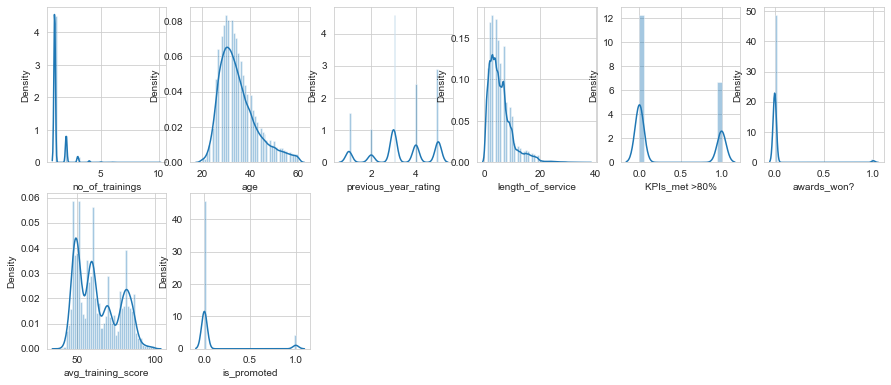

In [18]:
# Distribution plots of all columns
l = df_numerics_only.columns.values
plt.figure(figsize=(15,20))
for i in range(0,len(l)):
    plt.subplot(6,6,i+1)
    sns.distplot(data[l[i]],kde=True) 

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    
```    
The features - age,length_of_service, avg_training_score seems to be right-skewed. 
````    

    
</div>

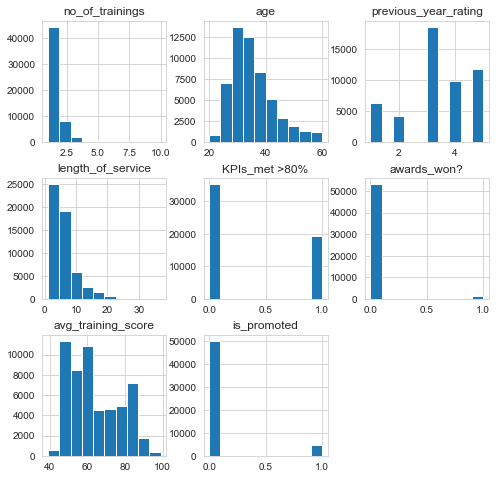

In [19]:
#Histogram plot of all columns
data.hist(figsize=(8,8))
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 

```
(1)Some histograms are tail-heavy; indeed several distributions are right-skewed (e.g. age,length_of_service, avg_training_score).

(2)Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.

(3)"employees awards_won?"  and "is_promoted"  have constant values in most of the columns .
 ```   

    
</div>

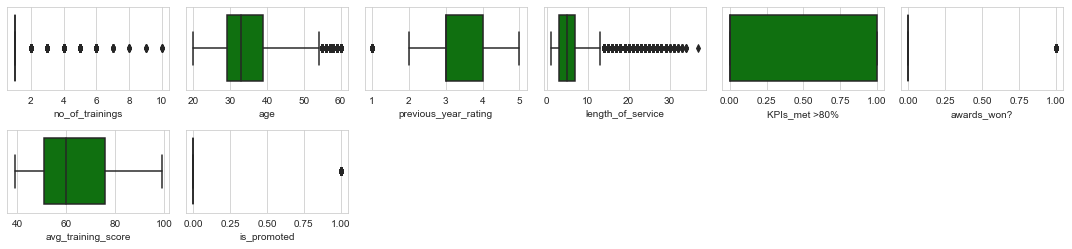

In [20]:
#outlier Detection using box plot
plt.figure(figsize=(15,10))
for i in range(0,len(l)):
    plt.subplot(6,6,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_numerics_only[l[i]],color='green',orient='v')
    plt.tight_layout()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 

- There are outliers in 
```    
"no_of_trainings"
"age"
"length_of_service" 
```    
    
</div>

<AxesSubplot:ylabel='employee_id'>

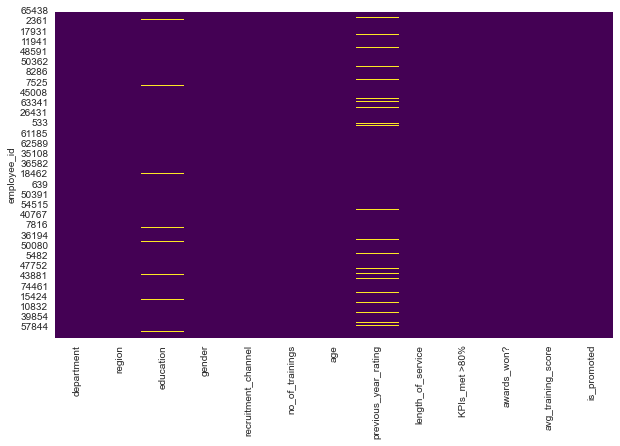

In [21]:
#Visualising proportion of null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>
    
``` 
A relatively less amount of null values are seen in the dataset, in the columns education and previous_year_rating which will be filled using relevant imputation methods
```    
</div>

<AxesSubplot:>

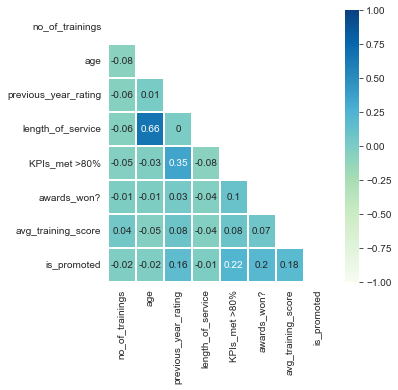

In [22]:
#To check correlation among features
plt.figure(figsize=(5,5))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr().round(2),vmin=-1,vmax=1,cmap='GnBu',mask=mask,linewidth=0.1,annot=True,center=0)

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
 
There is positive high correlation between:
```
(1) Age & Length Of Service        
    
```
    
</div>

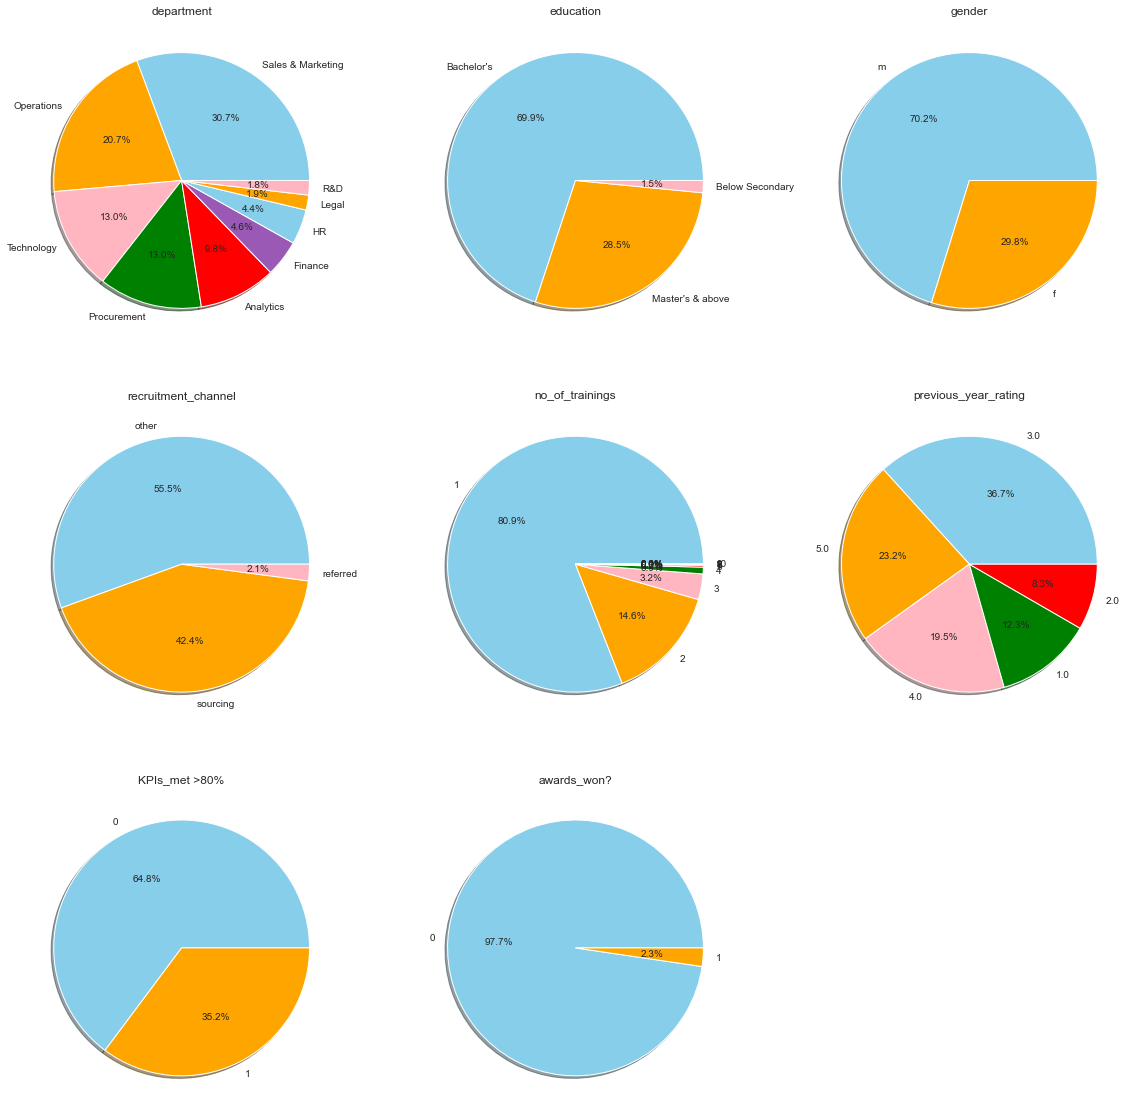

In [23]:
#Univariate analysis
#Pie charts of categorical columns
plt.figure(figsize=(20,20))
for i, col in enumerate(cat_cols): 
    plt.subplot(3,3,i+1)
    plt.title(col)
    plt.pie(data[col].value_counts(),labels=data[col].value_counts().index,autopct='%1.1f%%',shadow=True,colors=["skyblue","orange","lightpink","green","red","#9b59b6"])

<AxesSubplot:ylabel='region'>

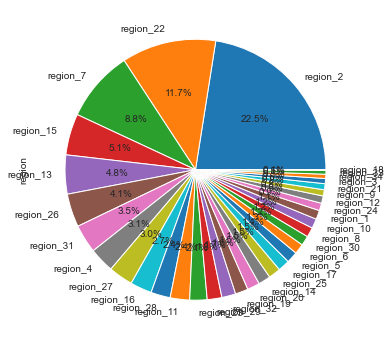

In [24]:
data["region"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(6, 6), startangle=0)

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 

```
(1) Department: A larger portion of employees are in the Sales and Marketing followed by the Operations department.(total 50% of the company)
(2) Education: Majority of about 70% employees have completed their Bachelor's degree and about 28.5% their Master's.
(3) Gender: About 70.2% of the employee population are males.
(4) Recruitment channel: Only about 2.1% of the employees have been appointed through referrals, 56.5% through sourcing platforms and the majority through other channels.
(5)No: of trainings:About a wider portion of 81% of the employees have done one training in the previous years.
(6)Previous year rating: above 80% of the employees have more than 3 in performance rating.
(7)KPIs_met >80% :only 35.2% of the employees have met the KPI of above 80%.  
(8)awards won:Only 2% of employees won awards for their job performance in the company
(9)Region: region_2 is more in counts with 22.5% and region_22 is 11.7% and region_7 is 8.8%. It means that these three regions cover almost 60% data.
```  

    
</div>

CATEGORICAL DISTRIBUTION BY THE TARGET (is_promoted)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


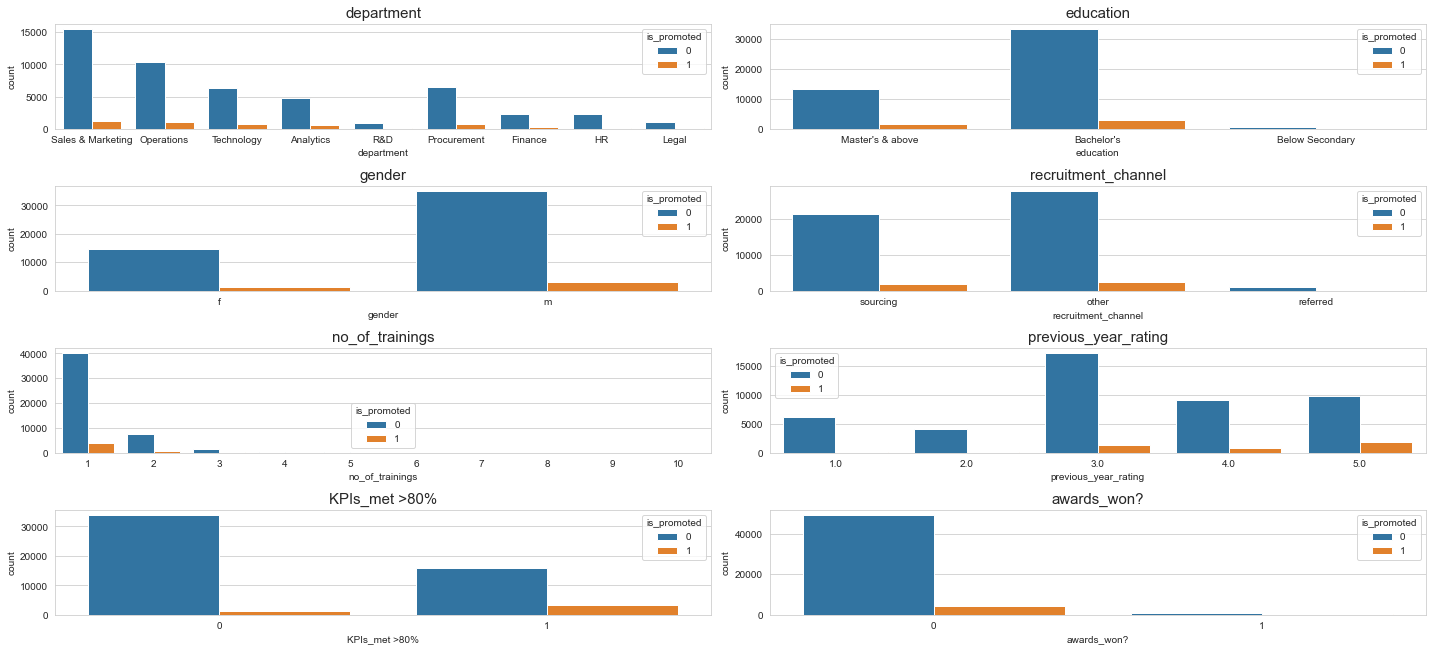

In [25]:
print("CATEGORICAL DISTRIBUTION BY THE TARGET (is_promoted)")
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

plt.figure(figsize=(20,20))
for i, col in enumerate(cat_cols):    
    plt.subplot(9,2,i+1)
    sns.set_style('whitegrid')
    plt.title(col,fontsize=15)
    sns_plot = sns.countplot(x=col, hue='is_promoted', data=data)
    plt.tight_layout()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    
````
(1)department-  Most of the Employees who are getting promotion are from Sales & Marketing ,Operations (ie more employees are working in these dept,may be thats the reason) 
    
(2)education-Most of the Employees who are getting promotion  have Bachelor's degree.Employees with education of Below Secondary are not getting any promotion
    
(3)gender-Employees who are getting promotion are mostly males
    
(4)recruitment_channel-Employees who are getting promotion are mostly recruited from other channels & sourcing 
    
(5)no_of_trainings -Employees who are getting promotion have attended less trainings
    
(6)previous_year_rating -Employees who are getting promotion have more than previous_year_rating of 3
    
(7)KPIs_met >80%-Employees who are getting promotion had met KPIs of above 80% 
    
(8)awards_won?-Employees who are getting promotion are who have won awards     
 
````
    
</div>

In [26]:
import plotly.express as px

age_attrition=data.groupby(['age','is_promoted']).apply(lambda x:x['age'].count()).reset_index(name='Counts')
px.line(age_attrition,x='age',y='Counts',color='is_promoted',title='Agewise Count of Employees ')


<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    
`Employees who are getting promotion are of the age groups 28-38. The  rate keeps on falling with increasing age`
    
</div>

In [27]:

yrs_attrtion=data.groupby(['length_of_service','is_promoted']).apply(lambda x:x['age'].count()).reset_index(name='Counts')
px.line(yrs_attrtion,x='length_of_service',y='Counts',color='is_promoted',title='Count of Employees w.r.t working years ')



<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    

`Employees who are getting the promotion  is in the starting years . When people are working for a long period of time, it gets diffcult to get promoted.`
    
</div>

### Bivariate  Analysis

### w.r.t Average training score

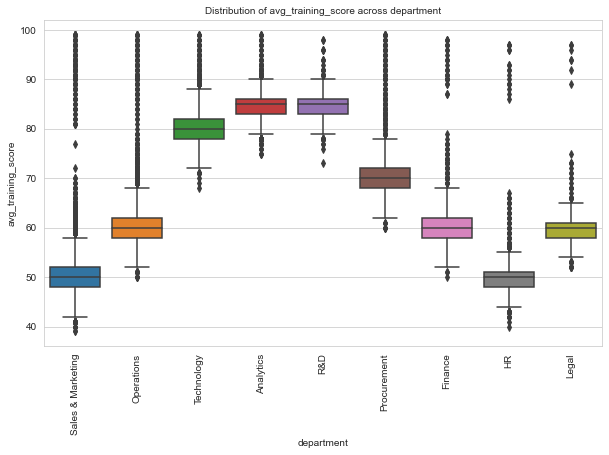

In [28]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x = data['department'], y =data['avg_training_score'], data = data)
ax.set_xlabel(xlabel = 'department', fontsize = 10)
ax.set_ylabel(ylabel = 'avg_training_score', fontsize = 10)
ax.set_title(label = 'Distribution of avg_training_score across department', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    
```   
(1)The average training scores in the current evaluation of the employees seem to the highest among the departments of Analytics and R & D followed by Technology.  
(2)Most of the employees in Sales & Marketing & HR have only average training score of around 50 
    
```   
    
</div>

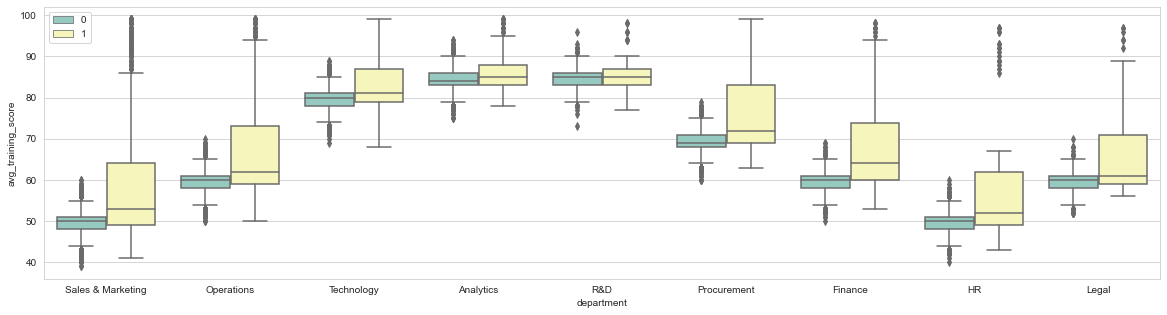

In [29]:
#box plot of mnthly income w.r.t job satisfaction
f,ax = plt.subplots(figsize=(20,5))
sns.boxplot(x='department', y='avg_training_score', data=data, hue='is_promoted',palette='Set3')
plt.legend(loc='best')
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    
```   
(1) employees in each  department who are  getting promoted had better average training scores  than other employees in the department .
```   
    
</div>

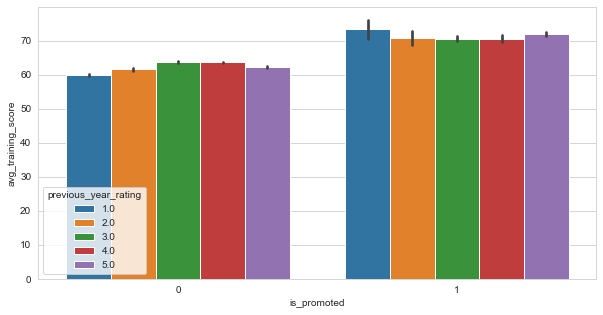

In [30]:
#Bar plot of Job Satisfaction with respect to Monthly income 

f,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='is_promoted', y='avg_training_score', hue= 'previous_year_rating',data=data)
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 

```

(1) The promoted employees with low previous year rating was seem to have the highest average training scores among the other promoted employees with higher scores in the previous year ratings.
(2) The employees with average training score below 70 do not seem to be promoted. So the cut-off range can be considered as 70.

```    
</div>

<AxesSubplot:xlabel='gender', ylabel='avg_training_score'>

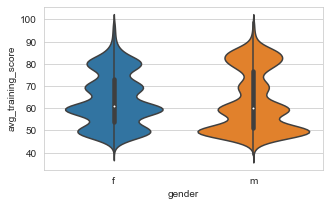

In [31]:
#violin plot of monthly income w.r.t department
plt.figure(figsize=(5,3))
sns.violinplot(x='gender',y='avg_training_score',data=data,size=6)

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 

```
(1) most male employees have got average training scores around 50 in the current evaluation and the female employees mostly scoring around 60.
```    
</div>

<AxesSubplot:xlabel='length_of_service', ylabel='avg_training_score'>

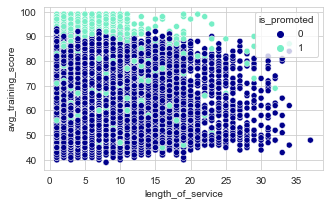

In [32]:
#Scatter plot of employees YearsAtCompany & PercentSalaryHike
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['length_of_service'],y=data['avg_training_score'],hue=data['is_promoted'],palette=['darkblue','#76EEC6'])

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 

```
(1)The employees who are getting promotions are majorly dependent on the average training score and not on length of service.
```    
</div>

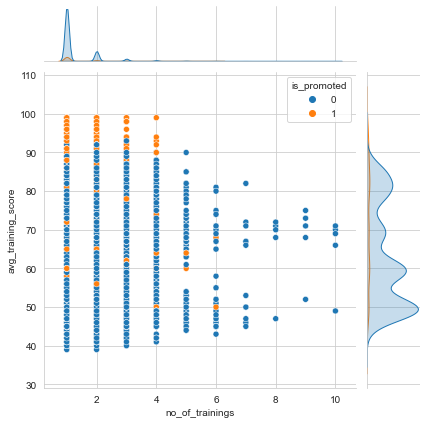

In [33]:
#scatter plot of Employees Age w.r.t MonthlyIncome
sns.jointplot(data.no_of_trainings,data.avg_training_score, hue=data['is_promoted'],kind = "scatter")   
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 


`(1)The employees who have done more than 6 trainings get less average training score & also are not getting promoted.`
    
</div>

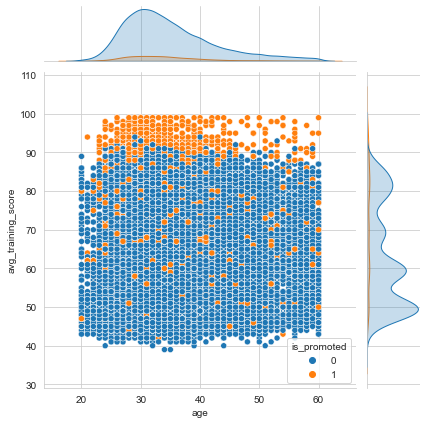

In [34]:
#jointplot of employees YearsAtCompany & Yearsincurrentrole
sns.jointplot(x='age',y='avg_training_score',hue='is_promoted',data=data)

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>     
    
 `(1)promotions are majorly dependent on the average training score and not on age.`    
</div>.

## Bivariate Analysis with getting promoted & previous year rating

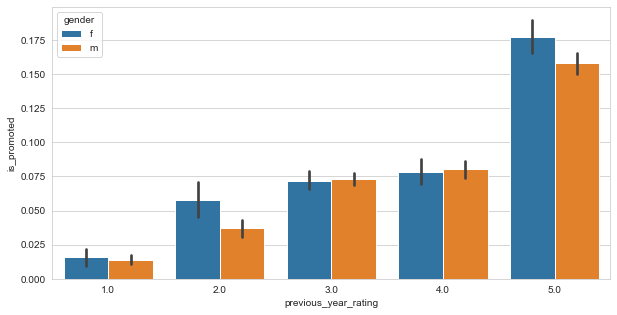

In [35]:
#Bar plot of MOnthly income from the rate of attrition according to gender

f,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='previous_year_rating', y='is_promoted', hue= 'gender',data=data)
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>     

```
The males and females employees with previous_year_rating of 3 & 4  are relatively getting promoted in the same amount
```    
</div>

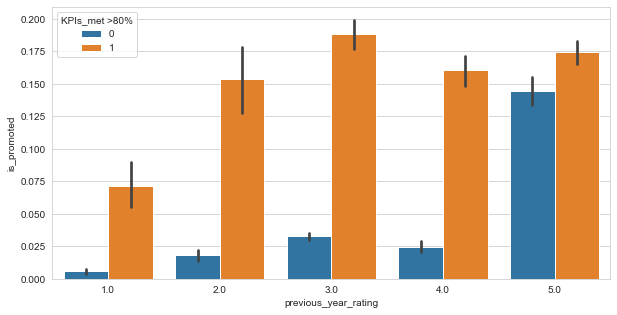

In [36]:
#Bar plot of Job Satisfaction with respect to Monthly income 

f,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='previous_year_rating', y='is_promoted', hue= 'KPIs_met >80%',data=data)
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>     

```
From this graph we can undertand that  , employees who met met KPIs_ >80  had more chance of getting promotion even they had low or high previous year rating
```    
</div>

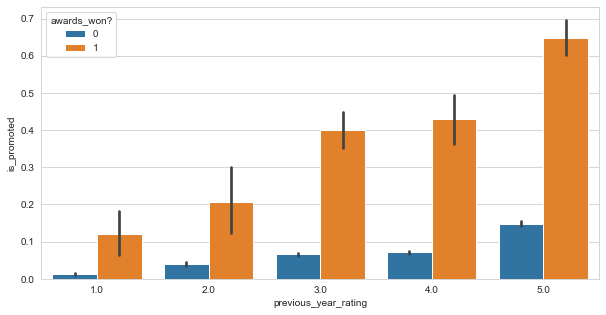

In [37]:
#Bar plot of Job Satisfaction with respect to Monthly income 

f,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='previous_year_rating', y='is_promoted', hue= 'awards_won?',data=data)
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>     
    
```    
   
From this graph we can undertand that  , employees who had won award  had more chance of getting promotion even they had low or high previous year rating

```    
</div>

### Pre-processing

#### Missing Value handling

In [38]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
##the percentage of missing values for each variable
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = round(data.isnull().mean()*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent_1], axis=1, keys=['Total', '%'])
missing_data.head(3)

Total     %
previous_year_rating   4062  7.43
education              2398  4.38
department                0  0.00

<u> **null values in previous_year_rating**    

In [39]:
# creating a dataframe of rows w.r.t null values in previous_year_rating
prev_year_null=data[data['previous_year_rating'].isnull()]
prev_year_null.head()

department     region   education gender  \
employee_id                                                    
29934               Technology  region_23         NaN      m   
71177              Procurement   region_5  Bachelor's      m   
74759        Sales & Marketing   region_4  Bachelor's      m   
45709        Sales & Marketing  region_31  Bachelor's      f   
26599        Sales & Marketing  region_16  Bachelor's      m   

            recruitment_channel  no_of_trainings  age  previous_year_rating  \
employee_id                                                                   
29934                  sourcing                1   30                   NaN   
71177                     other                1   27                   NaN   
74759                  sourcing                1   26                   NaN   
45709                     other                1   29                   NaN   
26599                     other                2   27                   NaN   

             length_of_service  KPIs_met >80%  awards_won?  \
employee_id                                                  
29934                        1              0            0   
71177                        1              0            0   
74759                        1              0            0   
45709                        1              0            0   
26599                        1              1            0   

             avg_training_score  is_promoted  
employee_id                                   
29934                        77            0  
71177                        70            0  
74759                        44            0  
45709                        49            0  
26599                        47            0

In [40]:
# checking null values in previous_year_rating w.r.t length of service
prev_year_null['length_of_service'].value_counts()

1    4062
Name: length_of_service, dtype: int64

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong>  
    
```     
length of service is 1 for all the employees with previous year rating as null.,which means they are the new recruits  So they dont have the previous year rating.so going to repalce with 0 for the null values.
```    
</div>

In [41]:
# filling null values in previous_year_rating with "0"
data['previous_year_rating'].fillna(value=0,inplace=True)

In [42]:
#checking for null values again
data.isnull().sum()

department                 0
region                     0
education               2398
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<u> **null values in education**    

In [43]:
# creating a dataframe of rows w.r.t null values in education
educ_emp_null=data[data['education'].isnull()]
educ_emp_null.head()

department     region education gender  \
employee_id                                                  
29934               Technology  region_23       NaN      m   
33332               Operations  region_15       NaN      m   
35465        Sales & Marketing   region_7       NaN      f   
17423        Sales & Marketing   region_2       NaN      m   
66013        Sales & Marketing   region_2       NaN      m   

            recruitment_channel  no_of_trainings  age  previous_year_rating  \
employee_id                                                                   
29934                  sourcing                1   30                   0.0   
33332                  sourcing                1   41                   4.0   
35465                  sourcing                1   24                   1.0   
17423                     other                3   24                   2.0   
66013                  sourcing                2   25                   3.0   

             length_of_service  KPIs_met >80%  awards_won?  \
employee_id                                                  
29934                        1              0            0   
33332                       11              0            0   
35465                        2              0            0   
17423                        2              0            0   
66013                        2              0            0   

             avg_training_score  is_promoted  
employee_id                                   
29934                        77            0  
33332                        57            0  
35465                        48            0  
17423                        48            0  
66013                        53            0

In [44]:
#count of null values in education w.r.t each Categorical features
for col in cat_cols:
    print(col,":\n", educ_emp_null[col].value_counts())
    print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

department :
 Sales & Marketing    1565
Analytics             336
Operations            226
Technology             99
Procurement            72
Finance                36
HR                     32
R&D                    28
Legal                   4
Name: department, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
education :
 Series([], Name: education, dtype: int64)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
gender :
 m    2007
f     391
Name: gender, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
recruitment_channel :
 other       1379
sourcing    1011
referred       8
Name: recruitment_channel, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
no_of_trainings :
 1    2052
2     278
3      49
4 

In [45]:
#checking count of education category in each department 
data.groupby('department')['education'].value_counts()

department         education       
Analytics          Bachelor's           3968
                   Master's & above     1037
Finance            Bachelor's           1894
                   Master's & above      499
                   Below Secondary       106
HR                 Bachelor's           1521
                   Master's & above      733
                   Below Secondary       127
Legal              Bachelor's            807
                   Master's & above      156
                   Below Secondary        65
Operations         Bachelor's           7753
                   Master's & above     3165
                   Below Secondary       175
Procurement        Bachelor's           4387
                   Master's & above     2543
                   Below Secondary       129
R&D                Bachelor's            542
                   Master's & above      429
Sales & Marketing  Bachelor's          11061
                   Master's & above     4163
Technology         

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong>  
    
```     
After checking null values in education w.rt .other columns ,didnt find any observations regarding why there was missing values in education column .so going to repalce null values with mode value of education i.e "Bachelor's" (70% of employees in the company have bachelores degree).
```    
</div>

In [46]:
# filling null values in education using mode value
data['education'].fillna(data['education'].mode()[0],inplace=True)

In [47]:
#checking for null values again
data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### Outlier Detection & Handling

In [48]:
#outlier columns
outlier_data = data[['no_of_trainings','age','length_of_service']]

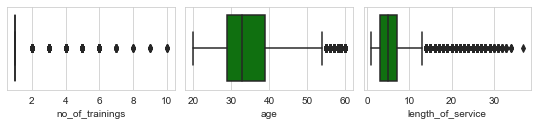

In [49]:
l = outlier_data.columns.values
#outlier Detection using box plot
plt.figure(figsize=(15,10))
for i in range(0,len(l)):
    plt.subplot(6,6,i+1)    
    sns.boxplot(df_numerics_only[l[i]],color='green',orient='v')
    plt.tight_layout()

In [50]:
#shape of dataframe before removing outlier removal
print("shape of dataframe before outlier removal",data.shape)

shape of dataframe before outlier removal (54690, 13)


<u>**Outlier handling in no_of_trainings**

In [51]:
from collections import Counter
#defining quantiles,IQR,upper limit and lower limit with IQR values
Q1=np.percentile(data['no_of_trainings'],25,interpolation='midpoint')
Q2=np.percentile(data['no_of_trainings'],50,interpolation='midpoint')
Q3=np.percentile(data['no_of_trainings'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)
print("━━━━━━━━━━━━━━━━━━━━━━")
IQR=Q3-Q1
print("IQR",IQR)
print("━━━━━━━━━━━━━━━━━━━━━━")
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)
print("━━━━━━━━━━━━━━━━━━━━━━")
# here outlier values are lower than lower limit and upper than upper limit
outlier=[]
for x in data['no_of_trainings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of outliers:', len(outlier))
print("━━━━━━━━━━━━━━━━━━━━━━")
print("count of outliers values:\n",Counter(outlier))

Q1 1.0
Q2 1.0
Q3 1.0
━━━━━━━━━━━━━━━━━━━━━━
IQR 0.0
━━━━━━━━━━━━━━━━━━━━━━
Lower limit 1.0
Upper Limit 1.0
━━━━━━━━━━━━━━━━━━━━━━
The count of outliers: 10421
━━━━━━━━━━━━━━━━━━━━━━
count of outliers values:
 Counter({2: 7983, 3: 1772, 4: 467, 5: 128, 6: 44, 7: 12, 8: 5, 9: 5, 10: 5})


In [52]:
#checking how many employers age morethan 54 have got promotion
no_of_trainings_promoted = data[(data['no_of_trainings']>=6) & (data['is_promoted']==1) ]
no_of_trainings_promoted['no_of_trainings'].value_counts()

6    2
Name: no_of_trainings, dtype: int64

<div class="alert alert-block alert-info"><b>Insights:</b>  <strong>  
    
(1)not removing all the outliers ,for the following reason:    
```  
From data analysis we know that employees who had no_of_trainings upto 6 have chance of getting promotion ,so removing those outliers will affect the bias of the analysis. 
```   
    
(2)can remove outliers with employees who had no_of_trainings  more than 6,
    
```   
because from the data analysis we understood that  no employees got promoted who had training more  than 6
``` 
</div>

In [53]:
low_lim=1
up_lim=6
outlier=[]
for x in data['no_of_trainings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of outliers:', len(outlier))
print("━━━━━━━━━━━━━━━━━━━━━━")
print("count of outliers values :\n",Counter(outlier))

The count of outliers: 27
━━━━━━━━━━━━━━━━━━━━━━
count of outliers values :
 Counter({7: 12, 8: 5, 9: 5, 10: 5})


In [54]:
#to find index of outlier values who have no of trainings more than 6
index=data['no_of_trainings'][(data['no_of_trainings']>up_lim)|(data['no_of_trainings']<low_lim)].index
print("count of index of rows to be removed:",len(index))
#removing outliers
data.drop(index,inplace=True)

count of index of rows to be removed: 27


<u>**Outlier handling in age**

In [55]:
#defining quantiles,IQR,upper limit and lower limit with IQR values
Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)
print("━━━━━━━━━━━━━━━━━━━━━━")
IQR=Q3-Q1
print("IQR",IQR)
print("━━━━━━━━━━━━━━━━━━━━━━")
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)
print("━━━━━━━━━━━━━━━━━━━━━━")
# here outlier values are lower than lower limit and upper than upper limit
outlier=[]
for x in data['age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of outliers:', len(outlier))
print("━━━━━━━━━━━━━━━━━━━━━━")
print("count of outliers values  :\n",Counter(outlier))


Q1 29.0
Q2 33.0
Q3 39.0
━━━━━━━━━━━━━━━━━━━━━━
IQR 10.0
━━━━━━━━━━━━━━━━━━━━━━
Lower limit 14.0
Upper Limit 54.0
━━━━━━━━━━━━━━━━━━━━━━
The count of outliers: 1433
━━━━━━━━━━━━━━━━━━━━━━
count of outliers values  :
 Counter({55: 293, 56: 264, 57: 238, 60: 216, 58: 213, 59: 209})


In [56]:
#checking how many employers age morethan 54 have got promotion
age_promoted = data[(data['age']>=55) & (data['is_promoted']==1) ] 
age_promoted['age'].value_counts()

56    21
55    18
59    17
58    16
60    14
57     5
Name: age, dtype: int64

<div class="alert alert-block alert-info"><b>Insights:</b>  <strong>  
    
(1)not removing all the outliers ,for the following reason:    
```  
From data analysis we know that 91 employees got promoted who aged more than  54 ,so removing those outliers will  affect the analysis. 
```   
 
</div>

<u>**Outlier handling in length_of_service**

In [57]:
#defining quantiles,IQR,upper limit and lower limit with IQR values
Q1=np.percentile(data['length_of_service'],25,interpolation='midpoint')
Q2=np.percentile(data['length_of_service'],50,interpolation='midpoint')
Q3=np.percentile(data['length_of_service'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)
print("━━━━━━━━━━━━━━━━━━━━━━")
IQR=Q3-Q1
print("IQR",IQR)
print("━━━━━━━━━━━━━━━━━━━━━━")
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)
print("━━━━━━━━━━━━━━━━━━━━━━")
# here outlier values are lower than lower limit and upper than upper limit
outlier=[]
for x in data['length_of_service']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of outliers:', len(outlier))
print("━━━━━━━━━━━━━━━━━━━━━━")
print("count of outliers values :\n",Counter(outlier))

Q1 3.0
Q2 5.0
Q3 7.0
━━━━━━━━━━━━━━━━━━━━━━
IQR 4.0
━━━━━━━━━━━━━━━━━━━━━━
Lower limit -3.0
Upper Limit 13.0
━━━━━━━━━━━━━━━━━━━━━━
The count of outliers: 3487
━━━━━━━━━━━━━━━━━━━━━━
count of outliers values :
 Counter({15: 593, 14: 549, 16: 547, 17: 431, 18: 392, 19: 329, 20: 128, 21: 78, 24: 70, 23: 65, 22: 61, 25: 51, 26: 41, 27: 36, 28: 30, 29: 30, 31: 20, 30: 12, 32: 10, 33: 9, 34: 4, 37: 1})


In [58]:
#checking how many employers who have length of service morethan 25 have got promotion
leng_service_promoted = data[(data['length_of_service']>=25) &       data['is_promoted'] == 1]
leng_service_promoted['length_of_service'].value_counts()

29    3
25    2
32    2
28    2
27    1
34    1
Name: length_of_service, dtype: int64

<div class="alert alert-block alert-info"><b>Insights:</b>  <strong>  
    
(1)not removing all the outliers ,for the following reason:    
```  
From data analysis we know that employees who had more length_of_service of 15 have less chance of getting promotion ,but removing those outliers will  affect the analysis. 
```   
    
(2)can remove outliers with employees who had length_of_service  more than 25,
    
```   
because from the data analysis we understood there are only  11 employees who got promoted with length_of_service more than 25 years,so removing outliers  of length_of_service rows with more than 25 years
``` 
</div>

In [59]:

low_lim=0
up_lim=24
outlier=[]
for x in data['length_of_service']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of outliers:', len(outlier))
print("━━━━━━━━━━━━━━━━━━━━━━")
print("count of outliers values :\n",Counter(outlier))

The count of outliers: 244
━━━━━━━━━━━━━━━━━━━━━━
count of outliers values :
 Counter({25: 51, 26: 41, 27: 36, 28: 30, 29: 30, 31: 20, 30: 12, 32: 10, 33: 9, 34: 4, 37: 1})


In [60]:
#to find index of outlier values who have length_of_service more than 25
index=data['length_of_service'][(data['length_of_service']>up_lim)|(data['length_of_service']<low_lim)].index
print("count of index of rows to be removed",len(index))
#removing outliers
data.drop(index,inplace=True)

count of index of rows to be removed 244


In [61]:
#shape of dataframe after outlier removal
print("shape of dataframe after outlier removal",data.shape)

shape of dataframe after outlier removal (54419, 13)


#### Feature Engineering

<AxesSubplot:ylabel='region'>

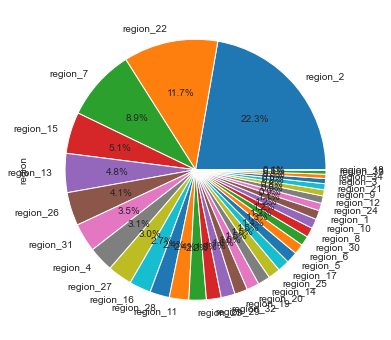

In [62]:
data["region"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(6, 6), startangle=0)

In [63]:
#if there is only less than 4% of employees from a region of employment ,labelling that regions as "others" 
Region_Dict = {}
for i,a in list(zip(data.region.value_counts().index.unique(),data.region.value_counts(1)*100)):
    if a <=4:
        Region_Dict[i] = "others"
    else:
        Region_Dict[i] = "" + str(i)


In [64]:
Region_Dict

{'region_2': 'region_2',
 'region_22': 'region_22',
 'region_7': 'region_7',
 'region_15': 'region_15',
 'region_13': 'region_13',
 'region_26': 'region_26',
 'region_31': 'others',
 'region_4': 'others',
 'region_27': 'others',
 'region_16': 'others',
 'region_28': 'others',
 'region_11': 'others',
 'region_23': 'others',
 'region_29': 'others',
 'region_32': 'others',
 'region_19': 'others',
 'region_20': 'others',
 'region_14': 'others',
 'region_25': 'others',
 'region_17': 'others',
 'region_5': 'others',
 'region_6': 'others',
 'region_30': 'others',
 'region_8': 'others',
 'region_10': 'others',
 'region_1': 'others',
 'region_24': 'others',
 'region_12': 'others',
 'region_9': 'others',
 'region_21': 'others',
 'region_3': 'others',
 'region_34': 'others',
 'region_33': 'others',
 'region_18': 'others'}

In [65]:
data.region= data.region.map(Region_Dict)

In [66]:
data.head()

department     region         education gender  \
employee_id                                                          
65438        Sales & Marketing   region_7  Master's & above      f   
65141               Operations  region_22        Bachelor's      m   
7513         Sales & Marketing     others        Bachelor's      m   
2542         Sales & Marketing     others        Bachelor's      m   
48945               Technology  region_26        Bachelor's      m   

            recruitment_channel  no_of_trainings  age  previous_year_rating  \
employee_id                                                                   
65438                  sourcing                1   35                   5.0   
65141                     other                1   30                   5.0   
7513                   sourcing                1   34                   3.0   
2542                      other                2   39                   1.0   
48945                     other                1   45                   3.0   

             length_of_service  KPIs_met >80%  awards_won?  \
employee_id                                                  
65438                        8              1            0   
65141                        4              0            0   
7513                         7              0            0   
2542                        10              0            0   
48945                        2              0            0   

             avg_training_score  is_promoted  
employee_id                                   
65438                        49            0  
65141                        60            0  
7513                         50            0  
2542                         50            0  
48945                        73            0

#### Feature Reduction

**already made employee id as index**


#### Encoding

**label encoding**

In [67]:
#label encoding for education
data.education.replace({'Below Secondary': 0, "Bachelor's": 1, "Master's & above": 2}, inplace=True)

#### one hot encoding



**label encoding is not good for other categorical values as  model will give weightage to the highest number in the feature than considering the category ,so using one hot encoding**



In [68]:
#using one hot encoding for gender,region,department
data=pd.get_dummies(data)
data.head()

education  no_of_trainings  age  previous_year_rating  \
employee_id                                                          
65438                2                1   35                   5.0   
65141                1                1   30                   5.0   
7513                 1                1   34                   3.0   
2542                 1                2   39                   1.0   
48945                1                1   45                   3.0   

             length_of_service  KPIs_met >80%  awards_won?  \
employee_id                                                  
65438                        8              1            0   
65141                        4              0            0   
7513                         7              0            0   
2542                        10              0            0   
48945                        2              0            0   

             avg_training_score  is_promoted  department_Analytics  \
employee_id                                                          
65438                        49            0                     0   
65141                        60            0                     0   
7513                         50            0                     0   
2542                         50            0                     0   
48945                        73            0                     0   

             department_Finance  department_HR  department_Legal  \
employee_id                                                        
65438                         0              0                 0   
65141                         0              0                 0   
7513                          0              0                 0   
2542                          0              0                 0   
48945                         0              0                 0   

             department_Operations  department_Procurement  department_R&D  \
employee_id                                                                  
65438                            0                       0               0   
65141                            1                       0               0   
7513                             0                       0               0   
2542                             0                       0               0   
48945                            0                       0               0   

             department_Sales & Marketing  department_Technology  \
employee_id                                                        
65438                                   1                      0   
65141                                   0                      0   
7513                                    1                      0   
2542                                    1                      0   
48945                                   0                      1   

             region_others  region_region_13  region_region_15  \
employee_id                                                      
65438                    0                 0                 0   
65141                    0                 0                 0   
7513                     1                 0                 0   
2542                     1                 0                 0   
48945                    0                 0                 0   

             region_region_2  region_region_22  region_region_26  \
employee_id                                                        
65438                      0                 0                 0   
65141                      0                 1                 0   
7513                       0                 0                 0   
2542                       0                 0                 0   
48945                      0                 0                 1   

             region_region_7  gender_f  gender_m  recruitment_channel_other  \
employee_id                                                                 

## Model Building

In [69]:
# feature columns
x=data.drop(['is_promoted'],axis=1)
#  target column
y=data['is_promoted']

## Standardization

In [70]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x[x.columns] = scale.fit_transform(x)


In [71]:
x

education  no_of_trainings       age  previous_year_rating  \
employee_id                                                               
65438         1.582171        -0.424163  0.037336              1.283449   
65141        -0.547545        -0.424163 -0.626389              1.283449   
7513         -0.547545        -0.424163 -0.095409             -0.054610   
2542         -0.547545         1.269594  0.568316             -1.392669   
48945        -0.547545        -0.424163  1.364786             -0.054610   
...                ...              ...       ...                   ...   
3030         -0.547545        -0.424163  1.763022             -0.054610   
74592         1.582171        -0.424163  0.302826             -0.723640   
13918        -0.547545        -0.424163 -1.024624              1.283449   
13614        -0.547545        -0.424163 -0.759134             -1.392669   
51526        -0.547545        -0.424163 -1.024624             -1.392669   

             length_of_service  KPIs_met >80%  awards_won?  \
employee_id                                                  
65438                 0.555340       1.354590     -0.15458   
65141                -0.442392      -0.738231     -0.15458   
7513                  0.305907      -0.738231     -0.15458   
2542                  1.054206      -0.738231     -0.15458   
48945                -0.941258      -0.738231     -0.15458   
...                        ...            ...          ...   
3030                  2.800236      -0.738231     -0.15458   
74592                 0.056474      -0.738231     -0.15458   
13918                -0.691825       1.354590     -0.15458   
13614                -0.941258      -0.738231     -0.15458   
51526                -0.192959      -0.738231     -0.15458   

             avg_training_score  department_Analytics  department_Finance  \
employee_id                                                                 
65438                 -1.076253             -0.329581           -0.220629   
65141                 -0.254089             -0.329581           -0.220629   
7513                  -1.001511             -0.329581           -0.220629   
2542                  -1.001511             -0.329581           -0.220629   
48945                  0.717561             -0.329581           -0.220629   
...                         ...                   ...                 ...   
3030                   1.091272             -0.329581           -0.220629   
74592                 -0.553058             -0.329581           -0.220629   
13918                  1.166014              3.034158           -0.220629   
13614                 -1.375223             -0.329581           -0.220629   
51526                 -1.076253             -0.329581           -0.220629   

             department_HR  department_Legal  department_Operations  \
employee_id                                                           
65438            -0.214889         -0.138966              -0.511094   
65141            -0.214889         -0.138966               1.956587   
7513             -0.214889         -0.138966              -0.511094   
2542             -0.214889         -0.138966              -0.511094   
48945            -0.214889         -0.138966              -0.511094   
...                    ...               ...                    ...   
3030             -0.214889         -0.138966              -0.511094   
74592            -0.214889         -0.138966               1.956587   
13918            -0.214889         -0.138966              -0.511094   
13614            -0.214889         -0.138966              -0.511094   
51526             4.653569         -0.138966              -0.511094   

             department_Procurement  department_R&D  \
employee_id                                           
65438                     -0.386352       -0.136751   
65141                     -0.386352       -0.136751   
7513                      -0.386352       -0.136751   
2542                      -0.

### Train and Test Split

In [72]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y,test_size=0.25)

In [73]:
print(" shape of x train",x_train.shape)
print(" shape of y train",y_train.shape)
print(" shape of x test",x_test.shape)
print(" shape of y test",y_test.shape)

 shape of x train (40814, 29)
 shape of y train (40814,)
 shape of x test (13605, 29)
 shape of y test (13605,)


## Handling class imbalance using SMOTE based techniques

## SMOTE Technique

In [74]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 37324, 1: 3490})
After Counter({0: 37324, 1: 37324})


## Modelling

In [75]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, auc, roc_curve,classification_report,confusion_matrix

In [76]:
model = {
    #"Logistic Regressor" : LogisticRegression(),
    #"KNeighbor Classifier" : KNeighborsClassifier(n_neighbors=6),
    #"Svmlinear" :SVC(kernel='linear'),
    #"Svmpoly" :SVC(kernel='poly',degree=3),
    #"SvmRadial" :SVC(kernel='rbf'),
    #"DecisionTree Classifier" : DecisionTreeClassifier(), 
    #"Gradient Boosting" : GradientBoostingClassifier(),   
    "Extreme gradient boosting":XGBClassifier(verbosity=0),
    'CatBoost' : CatBoostClassifier(logging_level='Silent'),
    'LightGBM' : LGBMClassifier(),
    #"AdaBoost Classifier" : AdaBoostClassifier(),
    #"RandomForest Classifier" : RandomForestClassifier(),
    #"Gaussian Naive-Bayes" : GaussianNB(),
    #"bernouli naive bayes" : BernoulliNB()   ,
    #"Multinomial Naive Bayes":MultinomialNB()
        }

### Performance Score of each models of actual data

In [77]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    try:
        score = classifier.predict_proba(x_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
        
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        #f1_score(y_test, pred, average='weighted'),
        f1_score(y_test, pred),
        #precision_score(y_test, pred, average='weighted'),     
        precision_score(y_test, pred),  
        #recall_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred),
        np.mean(cross_val_score(classifier, x_train, y_train, cv=5)),
        roc,
       
    ])

In [78]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall','cv','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

**classification_report**

**confusion matrix**

In [79]:
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)   
    print(mod)
    print('='*60)
    print(confusion_matrix(y_test,pred),"\n")

Extreme gradient boosting
[[12396    45]
 [  736   428]] 

CatBoost
[[12399    42]
 [  732   432]] 

LightGBM
[[12415    26]
 [  744   420]] 



### Performance Score of each models of SMOTE Resampled data

In [80]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(X_train_sm, y_train_sm)
    pred = classifier.predict(x_test)
    try:
        score = classifier.predict_proba(x_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
        
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        #f1_score(y_test, pred, average='weighted'),
        f1_score(y_test, pred),
        #precision_score(y_test, pred, average='weighted'),     
        precision_score(y_test, pred),  
        #recall_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred),
        np.mean(cross_val_score(classifier, X_train_sm, y_train_sm, cv=5)),
        roc,
       
    ])

In [81]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall','cv','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

### classification_report

## confusion_matrix

In [82]:
for mod in model:
    classifier = model[mod]
    classifier.fit(X_train_sm, y_train_sm)
    pred = classifier.predict(x_test)   
    print(mod)
    print('='*60)
    print(confusion_matrix(y_test,pred),"\n")

Extreme gradient boosting
[[12383    58]
 [  731   433]] 

CatBoost
[[12404    37]
 [  734   430]] 

LightGBM
[[12399    42]
 [  735   429]] 



## Hyperparameter Tuning of actual data

In [83]:
model = {  'XGBoost' : XGBClassifier(learning_rate =0.1, 
                                           n_estimators=200, 
                                           max_depth=4, 
                                           subsample = 0.70,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_local_histmaker",
                                           ),
                            
               'CatBoost' : CatBoostClassifier(learning_rate=0.03, 
                                                 n_estimators=500, 
                                                 subsample=0.085, 
                                                 max_depth=6, 
                                                 scale_pos_weight=2.5,logging_level='Silent'),
               
               'LightGBM' : LGBMClassifier(
                                             max_bin = 60,
                                             num_leaves = 100,
                                             boosting_type = 'dart',
                                             learning_rate=0.15, 
                                             n_estimators=500,
                                             max_depth=5, 
                                             scale_pos_weight=2.5)
 }

In [84]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    try:
        score = classifier.predict_proba(x_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
        
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        #f1_score(y_test, pred, average='weighted'),
        f1_score(y_test, pred),
        #precision_score(y_test, pred, average='weighted'),     
        precision_score(y_test, pred),  
        #recall_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred),
        #np.mean(cross_val_score(classifier, x_train, y_train, cv=5)),
        roc,
       
    ])

In [85]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

In [86]:
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)   
    print(mod)
    print('='*60)
    print(confusion_matrix(y_test,pred),"\n")

XGBoost
[[12253   188]
 [  674   490]] 

CatBoost
[[12322   119]
 [  700   464]] 

LightGBM
[[12251   190]
 [  672   492]] 



## Feature Importance

Fitting 3 folds for each of 3 candidates, totalling 9 fits


<AxesSubplot:xlabel='feature', ylabel='importance'>

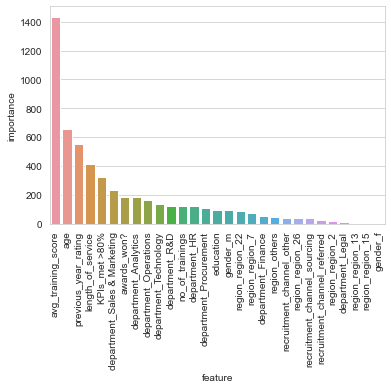

In [87]:
from sklearn.model_selection import GridSearchCV
forest = LGBMClassifier(max_bin = 60,
                                             num_leaves = 100,
                                             boosting_type = 'dart',
                                             learning_rate=0.15, 
                                             n_estimators=500,
                                             max_depth=5, 
                                             scale_pos_weight=2.5)
param_grid = {'n_estimators': [200,500,800]}
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importance = {}
for i in range(len(x_train.columns)):
    feature_importance[x_train.columns[i]] = feature_importances[i]
importance_df = pd.DataFrame(list(feature_importance.items()),columns=['feature','importance'])
importance_df = importance_df.sort_values('importance',ascending=False)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize'] = [18, 10]
sns.barplot(x="feature",y="importance",data=importance_df)

**From the feature importances we see that the average_training_score is the important criterion for the promotion**

<div class="alert alert-block alert-info"><b>Summary:</b><br>     <strong><br>     
  
- In this project, F-1 score is very useful for checking efficiency of model ,bcoz here we are dealing with imbalanced classes problems.we need to seek a balance between Precision and Recall .
    
       (1)best model based on actual data is 
       CatBoost (Accuracy score-94 & Fl score -52.7)
        
       (2)best model based on resampled data using SMOTE  is 
       LightGBM (Accuracy score-94 &  #   Fl score -53.25)
    
       (3)best model based on Hyperparameter Tuning of actual data  is 
       LightGBM (Accuracy score-93.6 &  #   Fl score -53.30)
    
    
#  Finally best model based on f1 score is  <u>LightGBM  </u>

 
    
    
</div>